In [1]:
# connect drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("deepcontractor/car-price-prediction-challenge")

print("Path to dataset files:", path)

100%|██████████| 429k/429k [00:00<00:00, 13.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/deepcontractor/car-price-prediction-challenge/versions/1


In [39]:
import pandas as pd

# load data
df = pd.read_csv(path + "/car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Adding a location feature into dataset
Because the data from Kaggle did not containt a location feature, which affect the used car's price in the reality. Price column will be modified base on Cost of living index of 53 cities in US (references: https://www.numbeo.com/cost-of-living/region_rankings.jsp?title=2025-mid&region=021 )

In [40]:
# load cost_of _living_by_US_city index
COLI_path = '/content/drive/MyDrive/Colab Notebooks/car_price_prediction/cost_of_living_us_city.csv'
cost_of_living_by_US_city = pd.read_csv(COLI_path)
cost_of_living_by_US_city.columns = ['City','State','Score']
cost_of_living_by_US_city.head()

,City,State,Score
0,Albuquerque,NM,63.0
1,Atlanta,GA,76.3
2,Austin,TX,66.3
3,Baltimore,MD,71.6
4,Boise,ID,66.5


In [41]:
# expanding train data by 30% and adding City and State columns into data
df = pd.concat([df, df.sample(frac=0.3, random_state=32, ignore_index= True)])
df[['City','State','Score']] = cost_of_living_by_US_city.iloc[:,:].sample(n = len(df), replace = True, random_state =32).values
df.head()

# modifing the price base on cost_of_living index
m = df['Score'].mean()
df['Price'] = df['Price'] * df['Score'] / m
df.drop(['Score'], axis=1, inplace=True)
df.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,City,State
0,45654403,14836.893439,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Los Angeles,CA
1,44731507,14370.809891,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,San Antonio,TX
2,45774419,9876.607957,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,Boston,MA
3,45769185,3138.383121,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,Louisville,KY
4,45809263,11099.502393,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,Indianapolis,IN


# Analyzing the dataset
Review the dataset and applying feature engine to improving model learning.


In [42]:
df.describe()

,ID,Prod. year,Cylinders,Airbags
count,2.500800e+04,25008.000000,25008.000000,25008.000000
mean,4.557565e+07,2010.900352,4.581414,6.588412
std,9.509910e+05,5.687992,1.195663,4.316629
min,2.074688e+07,1939.000000,1.000000,0.000000
25%,4.570061e+07,2009.000000,4.000000,4.000000
50%,4.577235e+07,2012.000000,4.000000,6.000000
75%,4.580197e+07,2015.000000,4.000000,12.000000
max,4.581665e+07,2020.000000,16.000000,16.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25008 entries, 0 to 5770
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25008 non-null  int64  
 1   Price             25008 non-null  object 
 2   Levy              25008 non-null  object 
 3   Manufacturer      25008 non-null  object 
 4   Model             25008 non-null  object 
 5   Prod. year        25008 non-null  int64  
 6   Category          25008 non-null  object 
 7   Leather interior  25008 non-null  object 
 8   Fuel type         25008 non-null  object 
 9   Engine volume     25008 non-null  object 
 10  Mileage           25008 non-null  object 
 11  Cylinders         25008 non-null  float64
 12  Gear box type     25008 non-null  object 
 13  Drive wheels      25008 non-null  object 
 14  Doors             25008 non-null  object 
 15  Wheel             25008 non-null  object 
 16  Color             25008 non-null  object 
 17 

In [44]:
# summary count values of each catergories
for col in df.columns:
    print(df[col].value_counts())
    print('---------------------------------')

ID
45815361    12
45815366    10
45815365    10
45815359     9
45786759     9
            ..
45794580     1
45768089     1
44571028     1
45756839     1
45816158     1
Name: count, Length: 18924, dtype: int64
---------------------------------
Price
16321.088167    21
19585.097637    17
459.654234      16
13986.444322    16
307.088148      16
                ..
46228.243952     1
10918.276896     1
17569.550973     1
40282.885791     1
1532.408431      1
Name: count, Length: 13294, dtype: int64
---------------------------------
Levy
-       7576
765      633
891      589
639      529
640      508
        ... 
1171       1
1365       1
3811       1
1039       1
1198       1
Name: count, Length: 559, dtype: int64
---------------------------------
Manufacturer
HYUNDAI          4890
TOYOTA           4774
MERCEDES-BENZ    2718
FORD             1433
CHEVROLET        1383
                 ... 
SATURN              2
LAMBORGHINI         1
PONTIAC             1
ASTON MARTIN        1
GREATWALL    

In [45]:
# remove records > 200k of Price columns
df = df[df['Price'] < 200000]

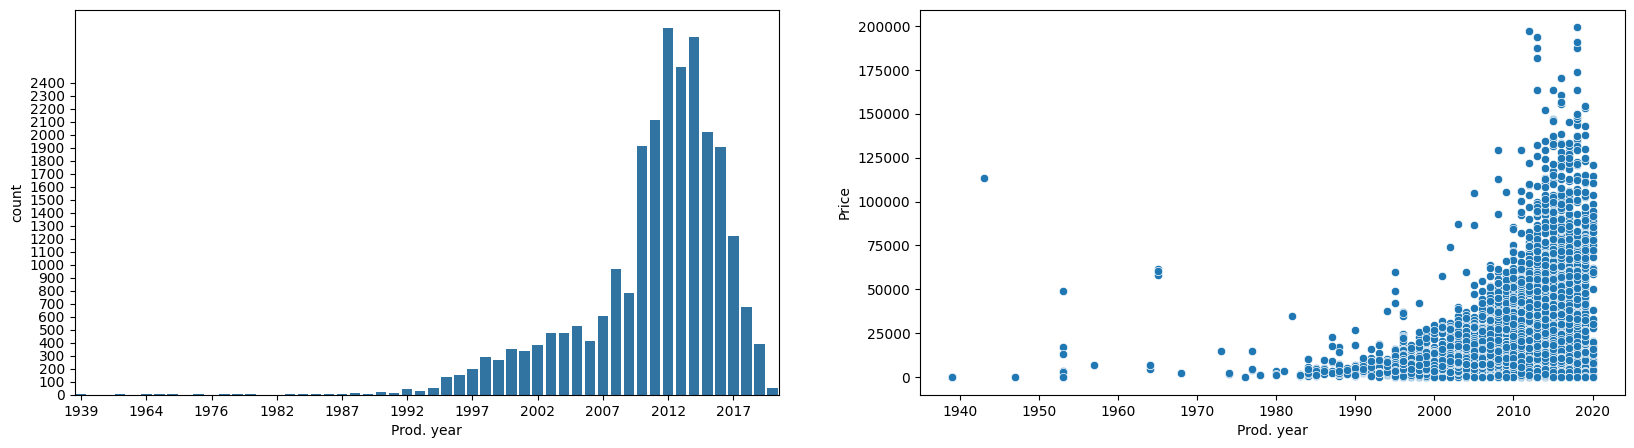

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot count distribution by Prod. year
fig, ax = plt.subplots(figsize=(20, 5), nrows= 1, ncols= 2)
sns.countplot(x=df['Prod. year'], ax = ax[0])
ax[0].set_xticks(ax[0].get_xticks()[::5])
yticks = range(0,2500,100)
ax[0].set_yticks(yticks)

# plot distribution Prod. year by target price
sns.scatterplot(x=df['Prod. year'], y=df['Price'], ax = ax[1])
plt.show()

In [47]:
# remove all records where product year < 1985
df = df[df['Prod. year'] >= 1985]

# convert value of Leather interior feature to int
leather_interior_map =  {'Yes': 1, 'No': 0}
df['Leather interior'] = df['Leather interior'].map(leather_interior_map)

# decode Mileage feature
df['Mileage'] = df['Mileage'].str.replace('km', '').astype(int)

# encode Wheel feature
wheel_map = {'Left wheel': 0, 'Right-hand drive': 1}
df['Wheel'] = df['Wheel'].map(wheel_map)

In [48]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo', '0',
       '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '6.3 Turbo', '0.2', '2.1 Turbo', '5.6', '6',
       '0.7 Turbo', '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1',
       '1.0 Turbo', '6.3', '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1',
       '5.0 Turbo', '6.4', '3

In [49]:
# function to decomposing value of Engine volume
def decomposing_engine_volume(value):
  if 'Turbo' in value:
    return float(value.split(' ')[0]), 1
  else:
    return float(value), 0

# decomposing Engine volume into 2 columns engine volumne and Turbo
df[['Engine volume', 'Turbo']] = df['Engine volume'].apply(decomposing_engine_volume).apply(pd.Series)

In [50]:
# split data and target
target = df['Price']
data = df.drop(['ID','Price','Levy'], axis=1)

In [51]:
from sklearn.preprocessing import OrdinalEncoder

# ordinal encoding features: Category, Color, Fuel type, Gear box type, Drive wheels, Doors
category_encoder = OrdinalEncoder(dtype='int64')
color_encoder = OrdinalEncoder(dtype='int64')
fuel_encoder = OrdinalEncoder(dtype='int64')
gear_box_encoder = OrdinalEncoder(dtype='int64')
drive_wheel_encoder = OrdinalEncoder(dtype='int64')
doors_encoder = OrdinalEncoder(dtype='int64')

data['Category'] = category_encoder.fit_transform(data[['Category']])
data['Color'] = color_encoder.fit_transform(data[['Color']])
data['Fuel type'] = fuel_encoder.fit_transform(data[['Fuel type']])
data['Gear box type'] = gear_box_encoder.fit_transform(data[['Gear box type']])
data['Drive wheels'] = drive_wheel_encoder.fit_transform(data[['Drive wheels']])
data['Doors'] = doors_encoder.fit_transform(data[['Doors']])


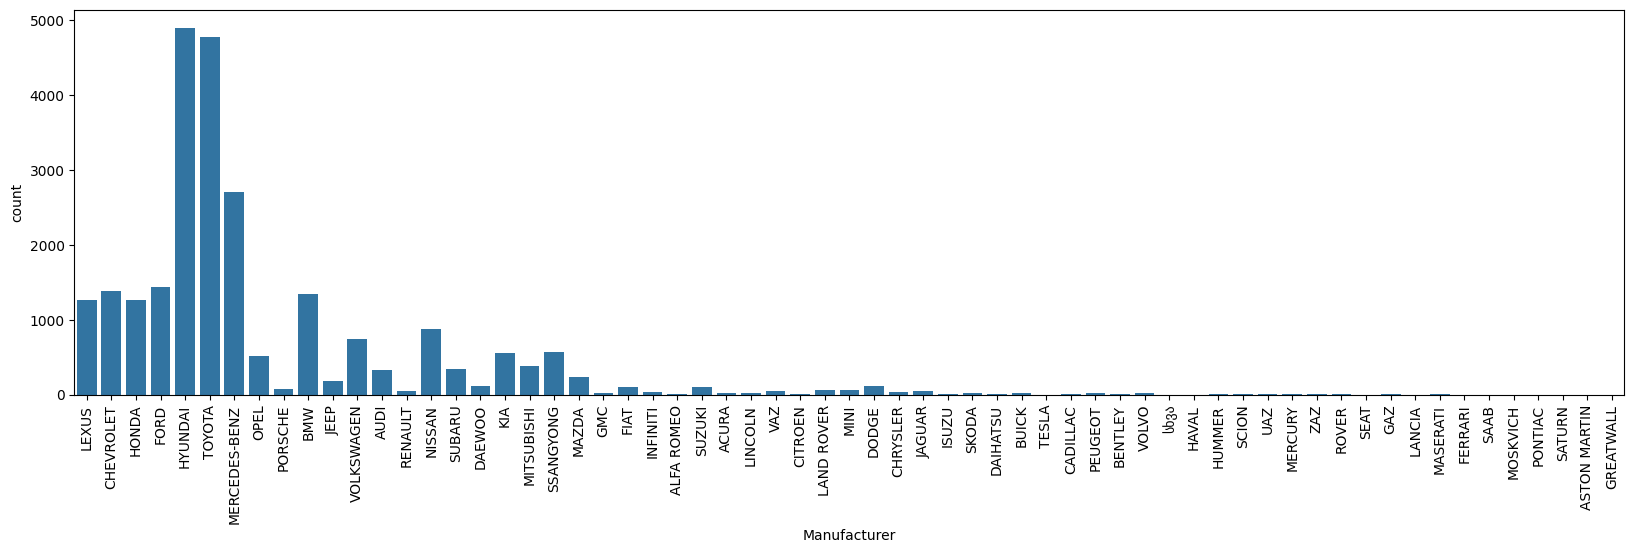

In [52]:
# plot the distribute of Manufacturer
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x=data['Manufacturer'], ax = ax)
plt.xticks(rotation=90)
plt.show()


In [53]:
from sklearn.preprocessing import TargetEncoder
# target encoding Manufacturer
manufacturer_encoder = TargetEncoder(target_type = 'continuous', smooth = 20)
data['Manufacturer']= manufacturer_encoder.fit_transform(data[['Manufacturer']], target)

# target encoding Model feature
model_encoder = TargetEncoder(target_type = 'continuous', smooth = 10)
data['Model']= model_encoder.fit_transform(data[['Model']], target)

# target encoding City feature
city_encoder = TargetEncoder(target_type = 'continuous', smooth = 'auto')
data['City']= city_encoder.fit_transform(data[['City']], target)
# target encoding State feature
state_encoder = TargetEncoder(target_type = 'continuous', smooth = 'auto')
data['State']= state_encoder.fit_transform(data[['State']], target)

In [54]:
data.head()

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,City,State,Turbo
0,18789.307855,11898.600332,2010,4,1,2,3.5,186005,6.0,0,0,1,0,12,12,21469.452101,20220.363437,0.0
1,15021.564610,11978.855545,2011,4,0,5,3.0,192000,6.0,2,0,1,0,1,8,14760.841167,15932.895260,0.0
2,14529.424283,11115.808552,2006,3,0,5,1.3,200000,4.0,3,1,1,1,1,2,19952.559746,19053.007507,0.0
3,15127.385177,8260.819966,2011,4,1,2,2.5,168966,4.0,0,0,1,0,14,0,14603.266377,14718.543531,0.0
4,14441.792356,11632.777282,2014,3,1,5,1.3,91901,4.0,0,1,1,0,12,4,16279.015640,16583.631309,0.0


### check mutual information

In [55]:
from sklearn.feature_selection import mutual_info_regression

# mutual information regression of the features
mi_scores = mutual_info_regression(data, target)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=data.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

,MI Scores
Model,0.345691
Prod. year,0.264415
Airbags,0.247508
Engine volume,0.199637
Manufacturer,0.179671
Mileage,0.139346
State,0.137241
Fuel type,0.123486
City,0.116686
Gear box type,0.109656


In [56]:
from datetime import datetime
# create interaction features between high scores
data['Age'] = datetime.now().year  - data['Prod. year']
data['Mileage_per_year'] = data['Mileage'] / (data['Age'] + 1)
data['Luxury-score'] = data['Airbags'] + 4 * data['Leather interior']
# drop Doors feature (score too low)
data.drop('Doors', axis=1, inplace= True)

### Check for Multicollinearity


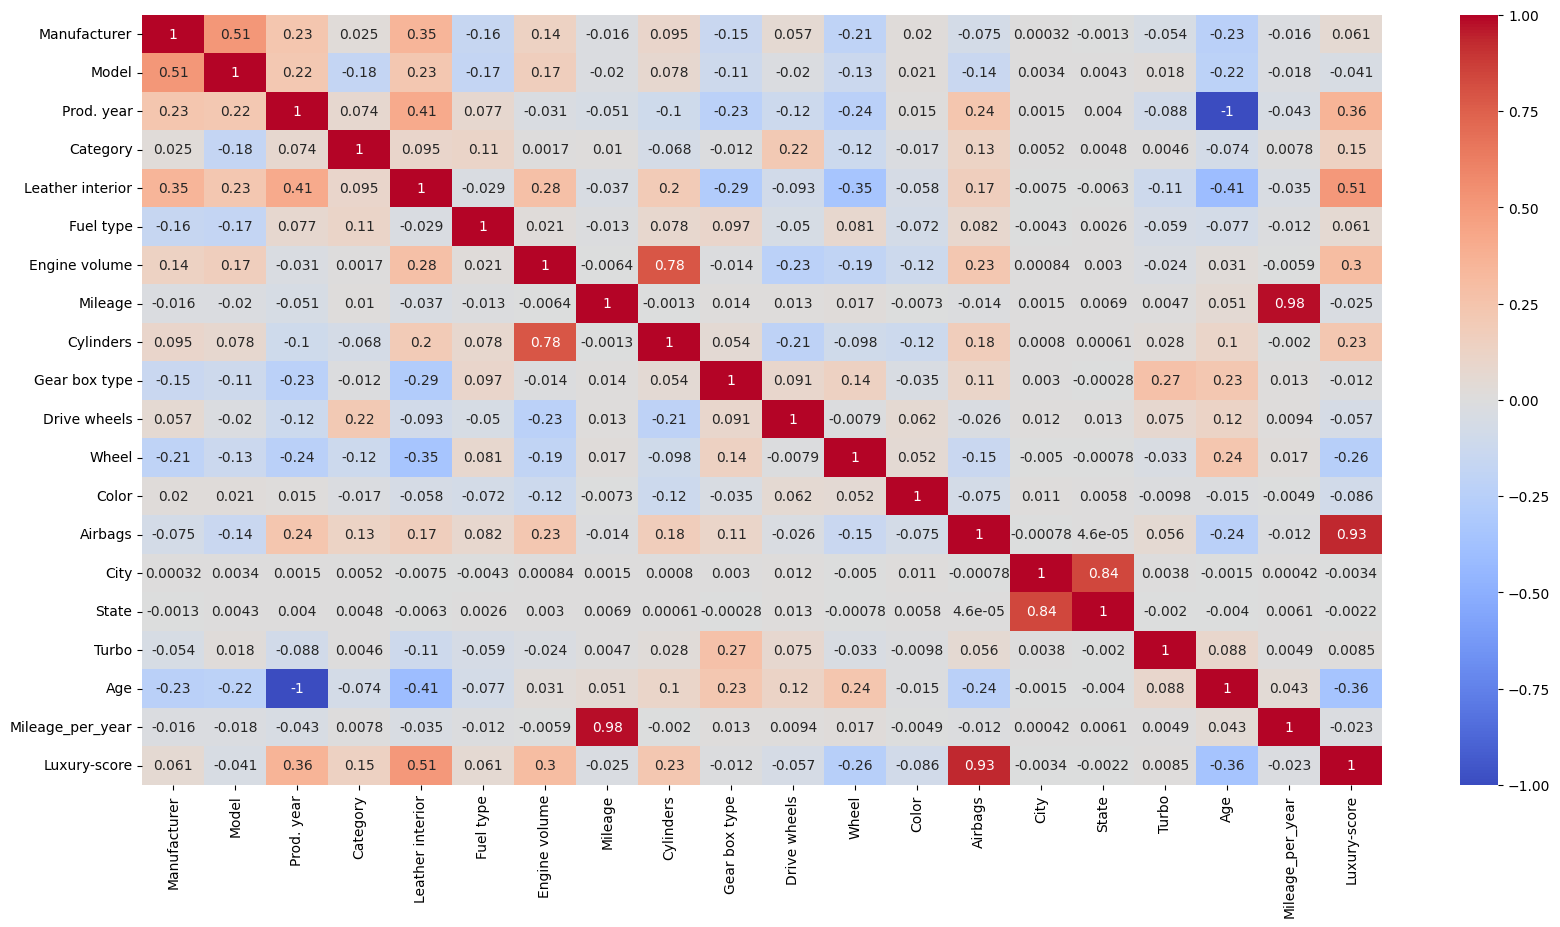

In [57]:
# plot correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [58]:
# drop redundancy features
data.drop(['Prod. year', 'Luxury-score'], axis=1, inplace= True)

In [59]:
data.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,City,State,Turbo,Age,Mileage_per_year
0,18789.307855,11898.600332,4,1,2,3.5,186005,6.0,0,0,0,12,12,21469.452101,20220.363437,0.0,15,11625.312500
1,15021.564610,11978.855545,4,0,5,3.0,192000,6.0,2,0,0,1,8,14760.841167,15932.895260,0.0,14,12800.000000
2,14529.424283,11115.808552,3,0,5,1.3,200000,4.0,3,1,1,1,2,19952.559746,19053.007507,0.0,19,10000.000000
3,15127.385177,8260.819966,4,1,2,2.5,168966,4.0,0,0,0,14,0,14603.266377,14718.543531,0.0,14,11264.400000
4,14441.792356,11632.777282,3,1,5,1.3,91901,4.0,0,1,0,12,4,16279.015640,16583.631309,0.0,11,7658.416667


## Standard Scales


In [61]:
from sklearn.preprocessing import StandardScaler

# duplicate data
data_scaled = data.copy()

# standard scale data
columns = ['Manufacturer', 'Model', 'Engine volume', 'Mileage', 'City','State','Age', 'Mileage_per_year']
scaler = StandardScaler()
data_scaled[columns] = scaler.fit_transform(data_scaled[columns])
# one hot encode the category feature
categories = ['Category', 'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels','Color', 'Airbags']
data_scaled = pd.get_dummies(data_scaled, columns=categories)
data_scaled.head()


,Manufacturer,Model,Leather interior,Engine volume,Mileage,Wheel,City,State,Turbo,Age,...,Airbags_7,Airbags_8,Airbags_9,Airbags_10,Airbags_11,Airbags_12,Airbags_13,Airbags_14,Airbags_15,Airbags_16
0,0.377708,-0.638908,1,1.371158,-0.025567,0,1.926117,1.602889,0.0,0.183854,...,False,False,False,False,False,True,False,False,False,False
1,-0.430666,-0.628293,0,0.797457,-0.025429,0,-0.966387,-0.531218,0.0,-0.003654,...,False,True,False,False,False,False,False,False,False,False
2,-0.536256,-0.742443,0,-1.153124,-0.025245,1,1.272090,1.021832,0.0,0.933885,...,False,False,False,False,False,False,False,False,False,False
3,-0.407962,-1.120055,1,0.223757,-0.025960,0,-1.034327,-1.135667,0.0,-0.003654,...,False,False,False,False,False,False,False,False,False,False
4,-0.555057,-0.674067,1,-1.153124,-0.027737,0,-0.311806,-0.207311,0.0,-0.566178,...,False,False,False,False,False,False,False,False,False,False


# Train Baseline Model

In [66]:
!pip install catboost
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.1 MB/s eta 0:00:00


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [63]:
# split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(data_scaled, target, test_size= 0.3)

In [68]:
models = {
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boost' : GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'XGBoost': XGBRegressor()
}

models_w_scaled ={
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

def evaluate_model(models, X_train, X_test, y_train, y_test):
  for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(list(models.keys())[i], " :")

    model_train_mse = round(mean_squared_error(y_train, y_train_pred),4)
    model_train_mae = round(mean_absolute_error(y_train, y_train_pred),4)
    model_train_r2 = round(r2_score(y_train, y_train_pred),4)
    print("Train MSE: ", model_train_mse)
    print("Train MAE: ", model_train_mae)
    print("Train R2: ", model_train_r2)
    print("--------------------------------")

    model_test_mse = round(mean_squared_error(y_test, y_test_pred),4)
    model_test_mae = round(mean_absolute_error(y_test, y_test_pred),4)
    model_test_r2 = round(r2_score(y_test, y_test_pred),4)
    print("Test MSE: ", model_test_mse)
    print("Test MAE: ", model_test_mae)
    print("Test R2: ", model_test_r2)

    print("================================")

evaluate_model(models, X_train, X_test, y_train, y_test)
evaluate_model(models_w_scaled, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

Random Forest  :
Train MSE:  10283814.9267
Train MAE:  1695.9147
Train R2:  0.9657
--------------------------------
Test MSE:  85582138.5124
Test MAE:  4674.1984
Test R2:  0.7389
AdaBoost  :
Train MSE:  531703269.2133
Train MAE:  20918.1335
Train R2:  -0.7727
--------------------------------
Test MSE:  551875180.5736
Test MAE:  21052.5951
Test R2:  -0.6834
Gradient Boost  :
Train MSE:  103030644.7536
Train MAE:  6584.9697
Train R2:  0.6565
--------------------------------
Test MSE:  136029746.375
Test MAE:  7127.6548
Test R2:  0.5851
Decision Tree  :
Train MSE:  0.0
Train MAE:  0.0
Train R2:  1.0
--------------------------------
Test MSE:  144974894.6235
Test MAE:  5899.7493
Test R2:  0.5578
CatBoost  :
Train MSE:  37839035.8483
Train MAE:  4092.3271
Train R2:  0.8738
--------------------------------
Test MSE:  81548859.2054
Test MAE:  5188.6559
Test R2:  0.7512
XGBoost  :
Train MSE:  24288206.0
Train MAE:  3332.071
Train R2:  0.919
--------------------------------
Test MSE:  89808160.

# Hyperparameter tunning top 3 performance models


In [69]:
# hyperparameter tunning Random Forest, XGboost, CatBoost
rf_param_dist = {
    "n_estimators": [100, 200, 400, 800],
    "max_depth": [None, 6, 10, 16],
    "min_samples_split": [2, 4, 8],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", 0.6, 0.8]
}
xgb_param_dist = {
    "n_estimators": [100, 200, 400, 800],
    "learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "subsample": [0.6, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.7, 0.8, 1.0],
    "reg_alpha": [0, 0.01, 0.1, 1],
    "reg_lambda": [1, 2, 5]
}
catboost_param_dist = {
    "iterations": [100,200,400,800],
    "learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2],
    "depth": [3, 5, 7, 9],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "border_count": [32, 64, 128, 256],
    "random_strength": [0, 0.5, 1]
}

In [70]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}

rf_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=rf_param_dist, n_iter=30, n_jobs=-1, cv=3, verbose=2)
rf_search.fit(X_train, y_train)
model_param['Random Forest'] = rf_search.best_params_

xgb_search = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=xgb_param_dist, n_iter=30, n_jobs=-1, cv=3, verbose=2)
xgb_search.fit(X_train, y_train)
model_param['XGBoost'] = xgb_search.best_params_

catboost_search = RandomizedSearchCV(estimator=CatBoostRegressor(verbose=0), param_distributions=catboost_param_dist, n_iter=30, n_jobs=-1, cv=3, verbose=2)
catboost_search.fit(X_train, y_train)
model_param['CatBoost'] = catboost_search.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [71]:
for model_name, param in model_param.items():
  print(model_name, ":", param)

Random Forest : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.6, 'max_depth': None}
XGBoost : {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 800, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
CatBoost : {'random_strength': 0, 'learning_rate': 0.2, 'l2_leaf_reg': 1, 'iterations': 800, 'depth': 7, 'border_count': 128}


In [72]:
# training and evaluating best models
rf_model = RandomForestRegressor(**model_param['Random Forest'])
xgb_model = XGBRegressor(**model_param['XGBoost'])
catboost_model = CatBoostRegressor(**model_param['CatBoost'], verbose=0)

models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'CatBoost': catboost_model
}

evaluate_model(models, X_train, X_test, y_train, y_test)

Random Forest  :
Train MSE:  9735508.1005
Train MAE:  1647.3038
Train R2:  0.9675
--------------------------------
Test MSE:  82365562.3865
Test MAE:  4611.8988
Test R2:  0.7488
XGBoost  :
Train MSE:  2371366.0
Train MAE:  1006.0934
Train R2:  0.9921
--------------------------------
Test MSE:  77667584.0
Test MAE:  4569.8628
Test R2:  0.7631
CatBoost  :
Train MSE:  10538550.7824
Train MAE:  2260.0882
Train R2:  0.9649
--------------------------------
Test MSE:  72005719.1496
Test MAE:  4695.7688
Test R2:  0.7804


In [73]:
# export the best model
import joblib as jb
best_model = models['CatBoost']
jb.dump(best_model, 'best_model.pkl')
print("Save best Model.")

Save best Model.
